In [1]:
import cptac
import scipy
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
import numpy as np
import math
import pandas as pd
import statistics
import cptac.utils as ut
from functools import reduce

In [2]:
cptac.download("brca")
cptac.download("ccrcc")
cptac.download("colon")
cptac.download("endometrial")
cptac.download("gbm")
cptac.download("luad")
cptac.download("ovarian")
cptac.download("hnscc")
cptac.download("lscc")

brca = cptac.Brca()
ccrcc = cptac.Ccrcc()
colon = cptac.Colon()
en = cptac.Endometrial()
gbm = cptac.Gbm()
luad = cptac.Luad()
ovarian = cptac.Ovarian()
hnscc  = cptac.Hnscc()
lscc = cptac.Lscc()

cptac warning: The GBM dataset is under publication embargo until March 01, 2021. CPTAC is a community resource project and data are made available rapidly after generation for community research use. The embargo allows exploring and utilizing the data, but analysis may not be published until after the embargo date. Please see https://proteomics.cancer.gov/data-portal/about/data-use-agreement or enter cptac.embargo() to open the webpage for more details. (C:\Users\humbe\miniconda3\lib\site-packages\ipykernel_launcher.py, line 15)


cptac warning: The HNSCC data is currently strictly reserved for CPTAC investigators. Otherwise, you are not authorized to access these data. Additionally, even after these data become publicly available, they will be subject to a publication embargo (see https://proteomics.cancer.gov/data-portal/about/data-use-agreement or enter cptac.embargo() to open the webpage for more details). (C:\Users\humbe\miniconda3\lib\site-packages\ipykernel_launcher.py, line 18)


version 3scc v3.2.......                 


cptac warning: The LSCC data is currently strictly reserved for CPTAC investigators. Otherwise, you are not authorized to access these data. Additionally, even after these data become publicly available, they will be subject to a publication embargo (see https://proteomics.cancer.gov/data-portal/about/data-use-agreement or enter cptac.embargo() to open the webpage for more details). (C:\Users\humbe\miniconda3\lib\site-packages\ipykernel_launcher.py, line 19)


C:\Users\humbe\miniconda3\lib\site-packages\ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  import sys


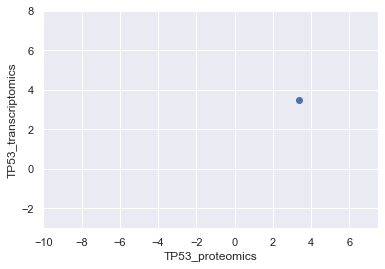

In [3]:
single_prot_trans = luad.multi_join({'proteomics' : ['TP53'], 'transcriptomics': ['TP53']}, tissue_type = 'tumor', levels_to_drop = ['Database_ID'])
single_prot = single_prot_trans.loc['X11LU013'][0]
single_trans = single_prot_trans.loc['X11LU013'][1]
plt.scatter(single_prot, single_trans)
plt.xlabel('TP53_proteomics')
plt.ylabel('TP53_transcriptomics')
axes = plt.axes()
axes.set_xlim(-10,7.5)
axes.set_ylim(-3,8)
plt.show()



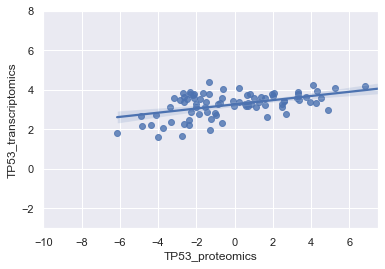

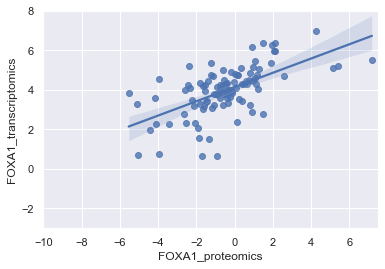

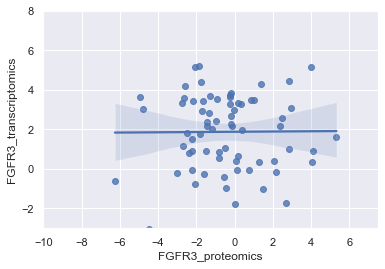

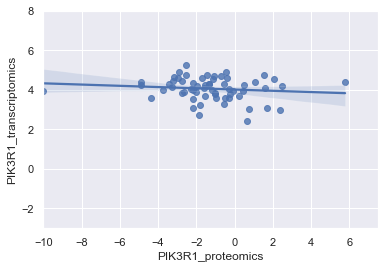

In [79]:
## Tumor correlations

test_prot_trans = luad.multi_join({'proteomics' : ['TP53'], 'transcriptomics': ['TP53']}, tissue_type = 'tumor', flatten = True)
test_prot_trans = pd.DataFrame(test_prot_trans[test_prot_trans.columns[0]]).join(pd.DataFrame(test_prot_trans[test_prot_trans.columns[-1]]),how= 'outer')
columns = test_prot_trans.columns
test_prot_trans = test_prot_trans.rename(columns={columns[0]: 'TP53_proteomics', columns[-1] : 'TP53_transcriptomics'})
tumor_plot1_datap = test_prot_trans['TP53_proteomics']
tumor_plot1_datat = test_prot_trans['TP53_transcriptomics']
tumor_plot1 = sns.regplot( x = 'TP53_proteomics', y= 'TP53_transcriptomics',  data = test_prot_trans)
tumor_plot1.set(xlim=(-10,7.5),ylim=(-3,8))
plt.show()


test_prot_trans = luad.multi_join({'proteomics' : ['FOXA1'], 'transcriptomics': ['FOXA1']}, tissue_type = 'tumor', flatten = True)
test_prot_trans = pd.DataFrame(test_prot_trans[test_prot_trans.columns[0]]).join(pd.DataFrame(test_prot_trans[test_prot_trans.columns[-1]]),how= 'outer')
columns = test_prot_trans.columns
test_prot_trans = test_prot_trans.rename(columns={columns[0]: 'FOXA1_proteomics', columns[-1] : 'FOXA1_transcriptomics'})
tumor_plot2_datap = test_prot_trans['FOXA1_proteomics']
tumor_plot2_datat = test_prot_trans['FOXA1_transcriptomics']
tumor_plot2 = sns.regplot( x = 'FOXA1_proteomics', y= 'FOXA1_transcriptomics',  data = test_prot_trans)
tumor_plot2.set(xlim=(-10,7.5),ylim=(-3,8))
plt.show()


test_prot_trans = luad.multi_join({'proteomics' : ['FGFR3'], 'transcriptomics': ['FGFR3']}, tissue_type = 'tumor', flatten = True)
test_prot_trans = pd.DataFrame(test_prot_trans[test_prot_trans.columns[0]]).join(pd.DataFrame(test_prot_trans[test_prot_trans.columns[-1]]),how= 'outer')
columns = test_prot_trans.columns
test_prot_trans = test_prot_trans.rename(columns={columns[0]: 'FGFR3_proteomics', columns[-1] : 'FGFR3_transcriptomics'})
tumor_plot3_datap = test_prot_trans['FGFR3_proteomics']
tumor_plot3_datat = test_prot_trans['FGFR3_transcriptomics']
tumor_plot3 = sns.regplot( x = 'FGFR3_proteomics', y= 'FGFR3_transcriptomics',  data = test_prot_trans)
tumor_plot3.set(xlim=(-10,7.5),ylim=(-3,8))
plt.show()


test_prot_trans = luad.multi_join({'proteomics' : ['PIK3R1'], 'transcriptomics': ['PIK3R1']}, tissue_type = 'tumor', flatten = True)
test_prot_trans = pd.DataFrame(test_prot_trans[test_prot_trans.columns[0]]).join(pd.DataFrame(test_prot_trans[test_prot_trans.columns[-1]]),how= 'outer')
columns = test_prot_trans.columns
test_prot_trans = test_prot_trans.rename(columns={columns[0]: 'PIK3R1_proteomics', columns[-1] : 'PIK3R1_transcriptomics'})
tumor_plot4_datap = test_prot_trans['PIK3R1_proteomics']
tumor_plot4_datat = test_prot_trans['PIK3R1_transcriptomics']
tumor_plot4 = sns.regplot( x = 'PIK3R1_proteomics', y= 'PIK3R1_transcriptomics',  data = test_prot_trans)
tumor_plot4.set(xlim=(-10,7.5),ylim=(-3,8))
plt.show()

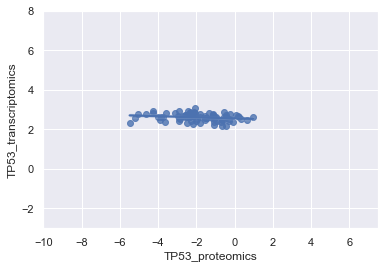

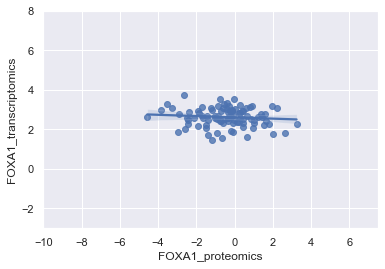

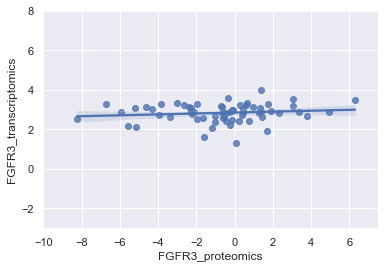

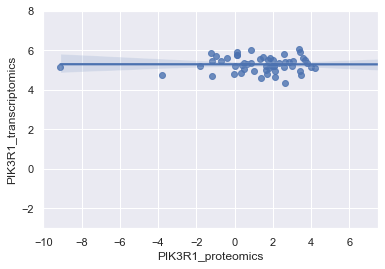

In [77]:
##Normal Correlations

test_prot_trans = luad.multi_join({'proteomics' : ['TP53'], 'transcriptomics': ['TP53']}, tissue_type = 'normal', flatten = True)
test_prot_trans = pd.DataFrame(test_prot_trans[test_prot_trans.columns[0]]).join(pd.DataFrame(test_prot_trans[test_prot_trans.columns[-1]]),how= 'outer')
columns = test_prot_trans.columns
test_prot_trans = test_prot_trans.rename(columns={columns[0]: 'TP53_proteomics', columns[-1] : 'TP53_transcriptomics'})
normal_plot1_datap = test_prot_trans['TP53_proteomics']
normal_plot1_datat = test_prot_trans['TP53_transcriptomics']
normal_plot1 = sns.regplot( x = 'TP53_proteomics', y= 'TP53_transcriptomics',  data = test_prot_trans)
normal_plot1.set(xlim=(-10,7.5),ylim=(-3,8))
plt.show()


test_prot_trans = luad.multi_join({'proteomics' : ['FOXA1'], 'transcriptomics': ['FOXA1']}, tissue_type = 'normal', flatten = True)
test_prot_trans = pd.DataFrame(test_prot_trans[test_prot_trans.columns[0]]).join(pd.DataFrame(test_prot_trans[test_prot_trans.columns[-1]]),how= 'outer')
columns = test_prot_trans.columns
test_prot_trans = test_prot_trans.rename(columns={columns[0]: 'FOXA1_proteomics', columns[-1] : 'FOXA1_transcriptomics'})
normal_plot2_datap = test_prot_trans['FOXA1_proteomics']
normal_plot2_datat = test_prot_trans['FOXA1_transcriptomics']
normal_plot2 = sns.regplot( x = 'FOXA1_proteomics', y= 'FOXA1_transcriptomics',  data = test_prot_trans)
normal_plot2.set(xlim=(-10,7.5),ylim=(-3,8))
plt.show()


test_prot_trans = luad.multi_join({'proteomics' : ['FGFR3'], 'transcriptomics': ['FGFR3']}, tissue_type = 'normal', flatten = True)
test_prot_trans = pd.DataFrame(test_prot_trans[test_prot_trans.columns[0]]).join(pd.DataFrame(test_prot_trans[test_prot_trans.columns[-1]]),how= 'outer')
columns = test_prot_trans.columns
test_prot_trans = test_prot_trans.rename(columns={columns[0]: 'FGFR3_proteomics', columns[-1] : 'FGFR3_transcriptomics'})
normal_plot3_datap = test_prot_trans['FGFR3_proteomics']
normal_plot3_datat = test_prot_trans['FGFR3_transcriptomics']
normal_plot3 = sns.regplot( x = 'FGFR3_proteomics', y= 'FGFR3_transcriptomics',  data = test_prot_trans)
normal_plot3.set(xlim=(-10,7.5),ylim=(-3,8))
plt.show()


test_prot_trans = luad.multi_join({'proteomics' : ['PIK3R1'], 'transcriptomics': ['PIK3R1']}, tissue_type = 'normal', flatten = True)
test_prot_trans = pd.DataFrame(test_prot_trans[test_prot_trans.columns[0]]).join(pd.DataFrame(test_prot_trans[test_prot_trans.columns[-1]]),how= 'outer')
columns = test_prot_trans.columns
test_prot_trans = test_prot_trans.rename(columns={columns[0]: 'PIK3R1_proteomics', columns[-1] : 'PIK3R1_transcriptomics'})
normal_plot4_datap = test_prot_trans['PIK3R1_proteomics']
normal_plot4_datat = test_prot_trans['PIK3R1_transcriptomics']
normal_plot4 = sns.regplot( x = 'PIK3R1_proteomics', y= 'PIK3R1_transcriptomics',  data = test_prot_trans)
normal_plot4.set(xlim=(-10,7.5),ylim=(-3,8))
plt.show()

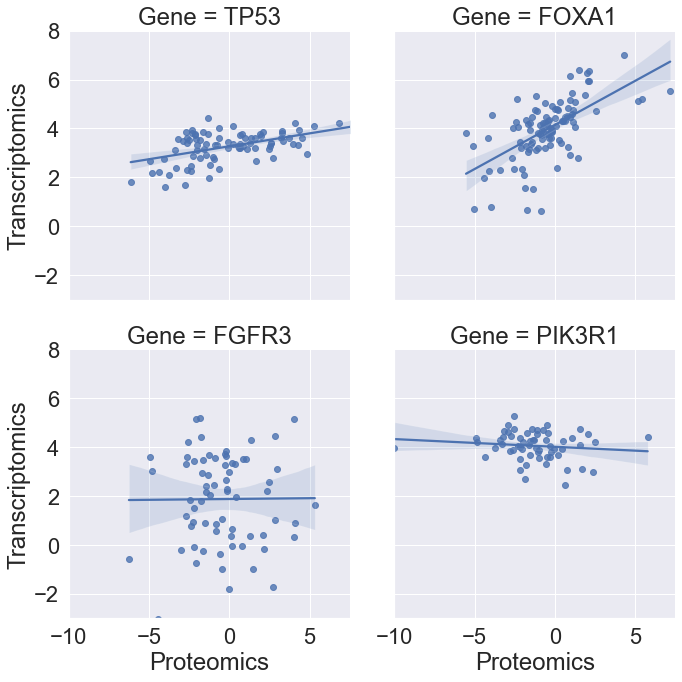

In [84]:
##All 4 in 1 plot Tumor
sns.set(font_scale=2)
protein_col = ((list(tumor_plot1_datap))+(list(tumor_plot2_datap))+(list(tumor_plot3_datap))+(list(tumor_plot4_datap)))
rna_col = ((list(tumor_plot1_datat))+(list(tumor_plot2_datat))+(list(tumor_plot3_datat))+(list(tumor_plot4_datat)))
gene_col = []
for i in range(110):
    gene_col.append('TP53')
for i in range(110):
    gene_col.append('FOXA1')
for i in range(110):
    gene_col.append('FGFR3')
for i in range(110):
    gene_col.append('PIK3R1')
cols = {'Proteomics' : protein_col, 'Transcriptomics': rna_col, 'Gene' : gene_col }
df = pd.DataFrame(cols)
plot = sns.lmplot(x="Proteomics", y="Transcriptomics", col="Gene", data=df,
           col_wrap=2);
axes = plot.axes
axes[0].set_ylim(-3,8)
axes[0].set_xlim(-10,7.5)
plt.show()

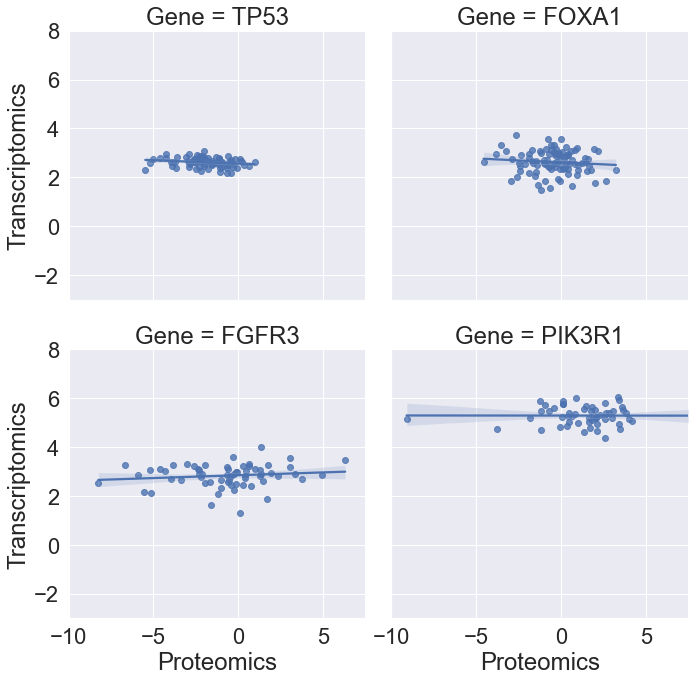

In [85]:
##All 4 in 1 plot Normal


protein_col = ((list(normal_plot1_datap))+(list(normal_plot2_datap))+(list(normal_plot3_datap))+(list(normal_plot4_datap)))
rna_col = ((list(normal_plot1_datat))+(list(normal_plot2_datat))+(list(normal_plot3_datat))+(list(normal_plot4_datat)))
gene_col = []
for i in range(101):
    gene_col.append('TP53')
for i in range(101):
    gene_col.append('FOXA1')
for i in range(101):
    gene_col.append('FGFR3')
for i in range(101):
    gene_col.append('PIK3R1')
cols = {'Proteomics' : protein_col, 'Transcriptomics': rna_col, 'Gene' : gene_col }
df = pd.DataFrame(cols)
plot = sns.lmplot(x="Proteomics", y="Transcriptomics", col="Gene", data=df,
           col_wrap=2);
axes = plot.axes
axes[0].set_ylim(-3,8)
axes[0].set_xlim(-10,7.5)
plt.show()

[(-3.0, 8.0), (-10.0, 7.5)]

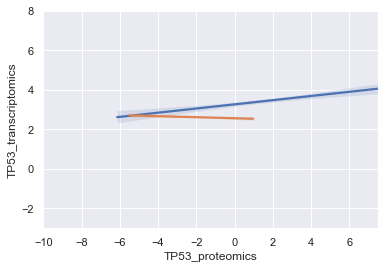

In [8]:
##PT53 Regression lines

tp53_prot_trans_t = luad.multi_join({'proteomics' : ['TP53'], 'transcriptomics': ['TP53']}, tissue_type = 'tumor', levels_to_drop = 'Database_ID')
tp53_prot_trans_n = luad.multi_join({'proteomics' : ['TP53'], 'transcriptomics': ['TP53']}, tissue_type = 'normal', levels_to_drop = 'Database_ID')
sns.regplot( x = 'TP53_proteomics', y= 'TP53_transcriptomics',  data = tp53_prot_trans_t, marker = '').set(xlim=(-10,7.5),ylim=(-3,8))
sns.regplot( x = 'TP53_proteomics', y= 'TP53_transcriptomics',  data = tp53_prot_trans_n, marker = '').set(xlim=(-10,7.5),ylim=(-3,8))


[(-3.0, 8.0), (-10.0, 7.5)]

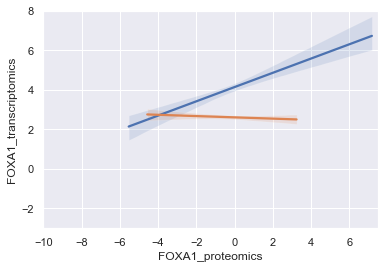

In [9]:
##FOXA1 Regression lines

foxa1_prot_trans_t = luad.multi_join({'proteomics' : ['FOXA1'], 'transcriptomics': ['FOXA1']}, tissue_type = 'tumor', levels_to_drop = 'Database_ID')
foxa1_prot_trans_n = luad.multi_join({'proteomics' : ['FOXA1'], 'transcriptomics': ['FOXA1']}, tissue_type = 'normal', levels_to_drop = 'Database_ID')
sns.regplot( x = 'FOXA1_proteomics', y= 'FOXA1_transcriptomics',  data = foxa1_prot_trans_t, marker = '').set(xlim=(-10,7.5),ylim=(-3,8))
sns.regplot( x = 'FOXA1_proteomics', y= 'FOXA1_transcriptomics',  data = foxa1_prot_trans_n, marker = '').set(xlim=(-10,7.5),ylim=(-3,8))


[(-3.0, 8.0), (-10.0, 7.5)]

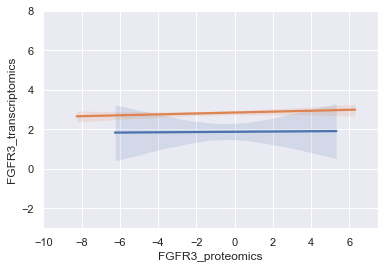

In [10]:
##FGFR3 Regression lines

fgdr3_prot_trans_t = luad.multi_join({'proteomics' : ['FGFR3'], 'transcriptomics': ['FGFR3']}, tissue_type = 'tumor', levels_to_drop = 'Database_ID')
fgdr3_prot_trans_n = luad.multi_join({'proteomics' : ['FGFR3'], 'transcriptomics': ['FGFR3']}, tissue_type = 'normal', levels_to_drop = 'Database_ID')
sns.regplot( x = 'FGFR3_proteomics', y= 'FGFR3_transcriptomics',  data = fgdr3_prot_trans_t, marker = '').set(xlim=(-10,7.5),ylim=(-3,8))
sns.regplot( x = 'FGFR3_proteomics', y= 'FGFR3_transcriptomics',  data = fgdr3_prot_trans_n, marker = '').set(xlim=(-10,7.5),ylim=(-3,8))


[(-3.0, 8.0), (-10.0, 7.5)]

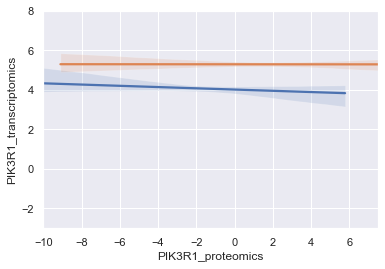

In [11]:
##PIK3R1 Regression lines

pik3r1_prot_trans_t = luad.multi_join({'proteomics' : ['PIK3R1'], 'transcriptomics': ['PIK3R1']}, tissue_type = 'tumor', flatten = True)
pik3r1_prot_trans_t = pd.DataFrame(pik3r1_prot_trans_t[pik3r1_prot_trans_t.columns[0]]).join(pd.DataFrame(pik3r1_prot_trans_t[pik3r1_prot_trans_t.columns[-1]]),how= 'outer')
columns = pik3r1_prot_trans_t.columns
pik3r1_prot_trans_t = pik3r1_prot_trans_t.rename(columns={columns[0]: 'PIK3R1_proteomics', columns[-1] : 'PIK3R1_transcriptomics'})
pik3r1_prot_trans_n = luad.multi_join({'proteomics' : ['PIK3R1'], 'transcriptomics': ['PIK3R1']}, tissue_type = 'normal', flatten = True)
pik3r1_prot_trans_n = pd.DataFrame(pik3r1_prot_trans_n[pik3r1_prot_trans_n.columns[0]]).join(pd.DataFrame(pik3r1_prot_trans_n[pik3r1_prot_trans_n.columns[-1]]),how= 'outer')
columns = pik3r1_prot_trans_n.columns
pik3r1_prot_trans_n = pik3r1_prot_trans_n.rename(columns={columns[0]: 'PIK3R1_proteomics', columns[-1] : 'PIK3R1_transcriptomics'})
sns.regplot( x = 'PIK3R1_proteomics', y= 'PIK3R1_transcriptomics',  data = pik3r1_prot_trans_t, marker = '').set(xlim=(-10,7.5),ylim=(-3,8))
sns.regplot( x = 'PIK3R1_proteomics', y= 'PIK3R1_transcriptomics',  data = pik3r1_prot_trans_n, marker = '').set(xlim=(-10,7.5),ylim=(-3,8))


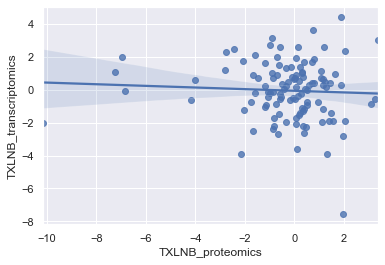

cptac warning: The following columns were not found in the proteomics dataframe, so they were inserted into joined table, but filled with NaN: TXLNB (C:\Users\humbe\miniconda3\lib\site-packages\ipykernel_launcher.py, line 14)


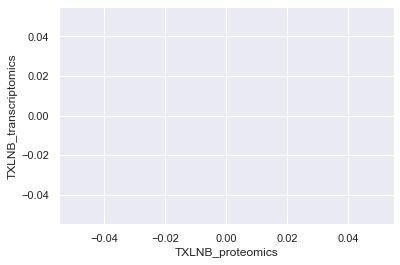

cptac warning: The following columns were not found in the proteomics dataframe, so they were inserted into joined table, but filled with NaN: TXLNB (C:\Users\humbe\miniconda3\lib\site-packages\ipykernel_launcher.py, line 25)
cptac warning: The following columns were not found in the transcriptomics dataframe, so they were inserted into joined table, but filled with NaN: TXLNB (C:\Users\humbe\miniconda3\lib\site-packages\ipykernel_launcher.py, line 25)
cptac warning: You tried to flatten a column index that didn't have multiple levels, so we didn't actually change anything. (C:\Users\humbe\miniconda3\lib\site-packages\cptac-0.8.1-py3.7.egg\cptac\dataset.py, line 697)


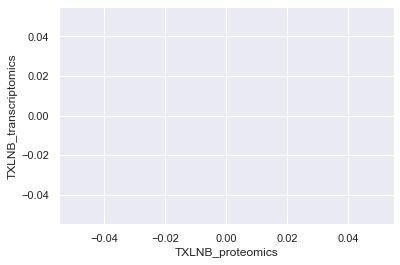

cptac warning: You tried to flatten a column index that didn't have multiple levels, so we didn't actually change anything. (C:\Users\humbe\miniconda3\lib\site-packages\cptac-0.8.1-py3.7.egg\cptac\dataset.py, line 697)


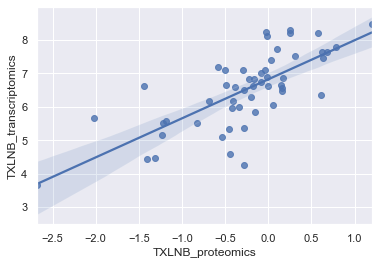

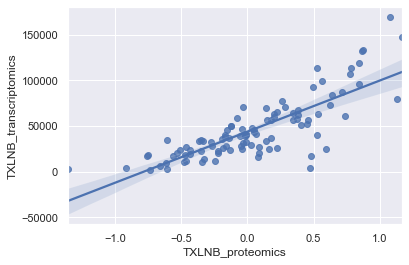

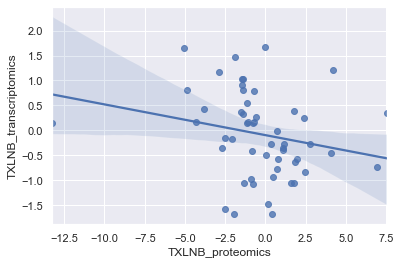

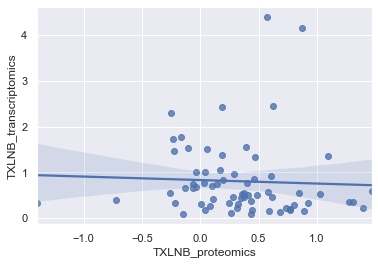

cptac warning: You tried to flatten a column index that didn't have multiple levels, so we didn't actually change anything. (C:\Users\humbe\miniconda3\lib\site-packages\cptac-0.8.1-py3.7.egg\cptac\dataset.py, line 697)


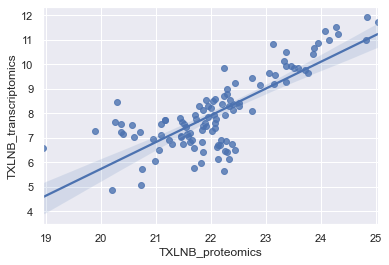

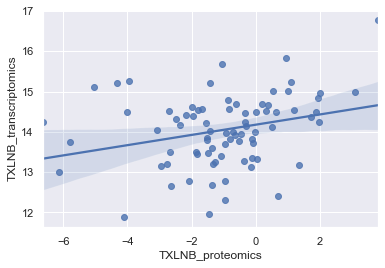

In [73]:
## Tumor correlations

test_prot_trans = brca.multi_join({'proteomics' : ['TXLNB'], 'transcriptomics': ['TXLNB']}, tissue_type = 'tumor', flatten = True)
test_prot_trans = pd.DataFrame(test_prot_trans[test_prot_trans.columns[0]]).join(pd.DataFrame(test_prot_trans[test_prot_trans.columns[-1]]),how= 'outer')
columns = test_prot_trans.columns
test_prot_trans = test_prot_trans.rename(columns={columns[0]: 'TXLNB_proteomics', columns[-1] : 'TXLNB_transcriptomics'})
tumor_plot1_datap = test_prot_trans['TXLNB_proteomics']
tumor_plot1_datat = test_prot_trans['TXLNB_transcriptomics']
tumor_plot1 = sns.regplot( x = 'TXLNB_proteomics', y= 'TXLNB_transcriptomics',  data = test_prot_trans)
# tumor_plot1.set(xlim=(-10,7.5),ylim=(-3,8))
plt.show()


test_prot_trans = ccrcc.multi_join({'proteomics' : ['TXLNB'], 'transcriptomics': ['TXLNB']}, tissue_type = 'tumor', flatten = True)
test_prot_trans = pd.DataFrame(test_prot_trans[test_prot_trans.columns[0]]).join(pd.DataFrame(test_prot_trans[test_prot_trans.columns[-1]]),how= 'outer')
columns = test_prot_trans.columns
test_prot_trans = test_prot_trans.rename(columns={columns[0]: 'TXLNB_proteomics', columns[-1] : 'TXLNB_transcriptomics'})
tumor_plot2_datap = test_prot_trans['TXLNB_proteomics']
tumor_plot2_datat = test_prot_trans['TXLNB_transcriptomics']
tumor_plot2 = sns.regplot( x = 'TXLNB_proteomics', y= 'TXLNB_transcriptomics',  data = test_prot_trans)
# tumor_plot2.set(xlim=(-10,7.5),ylim=(-3,8))
plt.show()


test_prot_trans = colon.multi_join({'proteomics' : ['TXLNB'], 'transcriptomics': ['TXLNB']}, tissue_type = 'tumor', flatten = True)
test_prot_trans = pd.DataFrame(test_prot_trans[test_prot_trans.columns[0]]).join(pd.DataFrame(test_prot_trans[test_prot_trans.columns[-1]]),how= 'outer')
columns = test_prot_trans.columns
test_prot_trans = test_prot_trans.rename(columns={columns[0]: 'TXLNB_proteomics', columns[-1] : 'TXLNB_transcriptomics'})
tumor_plot3_datap = test_prot_trans['TXLNB_proteomics']
tumor_plot3_datat = test_prot_trans['TXLNB_transcriptomics']
tumor_plot3 = sns.regplot( x = 'TXLNB_proteomics', y= 'TXLNB_transcriptomics',  data = test_prot_trans)
# tumor_plot3.set(xlim=(-10,7.5),ylim=(-3,8))
plt.show()


test_prot_trans = en.multi_join({'proteomics' : ['TXLNB'], 'transcriptomics': ['TXLNB']}, tissue_type = 'tumor', flatten = True)
test_prot_trans = pd.DataFrame(test_prot_trans[test_prot_trans.columns[0]]).join(pd.DataFrame(test_prot_trans[test_prot_trans.columns[-1]]),how= 'outer')
columns = test_prot_trans.columns
test_prot_trans = test_prot_trans.rename(columns={columns[0]: 'TXLNB_proteomics', columns[-1] : 'TXLNB_transcriptomics'})
tumor_plot4_datap = test_prot_trans['TXLNB_proteomics']
tumor_plot4_datat = test_prot_trans['TXLNB_transcriptomics']
tumor_plot4 = sns.regplot( x = 'TXLNB_proteomics', y= 'TXLNB_transcriptomics',  data = test_prot_trans)
# tumor_plot4.set(xlim=(-10,7.5),ylim=(-3,8))
plt.show()

test_prot_trans = gbm.multi_join({'proteomics' : ['TXLNB'], 'transcriptomics': ['TXLNB']}, tissue_type = 'tumor', flatten = True)
test_prot_trans = pd.DataFrame(test_prot_trans[test_prot_trans.columns[0]]).join(pd.DataFrame(test_prot_trans[test_prot_trans.columns[-1]]),how= 'outer')
columns = test_prot_trans.columns
test_prot_trans = test_prot_trans.rename(columns={columns[0]: 'TXLNB_proteomics', columns[-1] : 'TXLNB_transcriptomics'})
tumor_plot5_datap = test_prot_trans['TXLNB_proteomics']
tumor_plot5_datat = test_prot_trans['TXLNB_transcriptomics']
tumor_plot5 = sns.regplot( x = 'TXLNB_proteomics', y= 'TXLNB_transcriptomics',  data = test_prot_trans)
# tumor_plot5.set(xlim=(-10,7.5),ylim=(-3,8))
plt.show()

test_prot_trans = luad.multi_join({'proteomics' : ['TXLNB'], 'transcriptomics': ['TXLNB']}, tissue_type = 'tumor', flatten = True)
test_prot_trans = pd.DataFrame(test_prot_trans[test_prot_trans.columns[0]]).join(pd.DataFrame(test_prot_trans[test_prot_trans.columns[-1]]),how= 'outer')
columns = test_prot_trans.columns
test_prot_trans = test_prot_trans.rename(columns={columns[0]: 'TXLNB_proteomics', columns[-1] : 'TXLNB_transcriptomics'})
tumor_plot6_datap = test_prot_trans['TXLNB_proteomics']
tumor_plot6_datat = test_prot_trans['TXLNB_transcriptomics']
tumor_plot6 = sns.regplot( x = 'TXLNB_proteomics', y= 'TXLNB_transcriptomics',  data = test_prot_trans)
# tumor_plot6.set(xlim=(-10,7.5),ylim=(-3,8))
plt.show()

test_prot_trans = ovarian.multi_join({'proteomics' : ['TXLNB'], 'transcriptomics': ['TXLNB']}, tissue_type = 'tumor', flatten = True)
test_prot_trans = pd.DataFrame(test_prot_trans[test_prot_trans.columns[0]]).join(pd.DataFrame(test_prot_trans[test_prot_trans.columns[-1]]),how= 'outer')
columns = test_prot_trans.columns
test_prot_trans = test_prot_trans.rename(columns={columns[0]: 'TXLNB_proteomics', columns[-1] : 'TXLNB_transcriptomics'})
tumor_plot7_datap = test_prot_trans['TXLNB_proteomics']
tumor_plot7_datat = test_prot_trans['TXLNB_transcriptomics']
tumor_plot7 = sns.regplot( x = 'TXLNB_proteomics', y= 'TXLNB_transcriptomics',  data = test_prot_trans)
# tumor_plot7.set(xlim=(-10,7.5),ylim=(-3,8))
plt.show()

test_prot_trans = hnscc.multi_join({'proteomics' : ['TXLNB'], 'transcriptomics': ['TXLNB']}, tissue_type = 'tumor', flatten = True)
test_prot_trans = pd.DataFrame(test_prot_trans[test_prot_trans.columns[0]]).join(pd.DataFrame(test_prot_trans[test_prot_trans.columns[-1]]),how= 'outer')
columns = test_prot_trans.columns
test_prot_trans = test_prot_trans.rename(columns={columns[0]: 'TXLNB_proteomics', columns[-1] : 'TXLNB_transcriptomics'})
tumor_plot8_datap = test_prot_trans['TXLNB_proteomics']
tumor_plot8_datat = test_prot_trans['TXLNB_transcriptomics']
tumor_plot8 = sns.regplot( x = 'TXLNB_proteomics', y= 'TXLNB_transcriptomics',  data = test_prot_trans)
# tumor_plot8.set(xlim=(-10,7.5),ylim=(-3,8))
plt.show()

test_prot_trans = lscc.multi_join({'proteomics' : ['TXLNB'], 'transcriptomics': ['TXLNB']}, tissue_type = 'tumor', flatten = True)
test_prot_trans = pd.DataFrame(test_prot_trans[test_prot_trans.columns[0]]).join(pd.DataFrame(test_prot_trans[test_prot_trans.columns[-1]]),how= 'outer')
columns = test_prot_trans.columns
test_prot_trans = test_prot_trans.rename(columns={columns[0]: 'TXLNB_proteomics', columns[-1] : 'TXLNB_transcriptomics'})
tumor_plot9_datap = test_prot_trans['TXLNB_proteomics']
tumor_plot9_datat = test_prot_trans['TXLNB_transcriptomics']
tumor_plot9 = sns.regplot( x = 'TXLNB_proteomics', y= 'TXLNB_transcriptomics',  data = test_prot_trans)
# tumor_plot9.set(xlim=(-10,7.5),ylim=(-3,8))
plt.show()

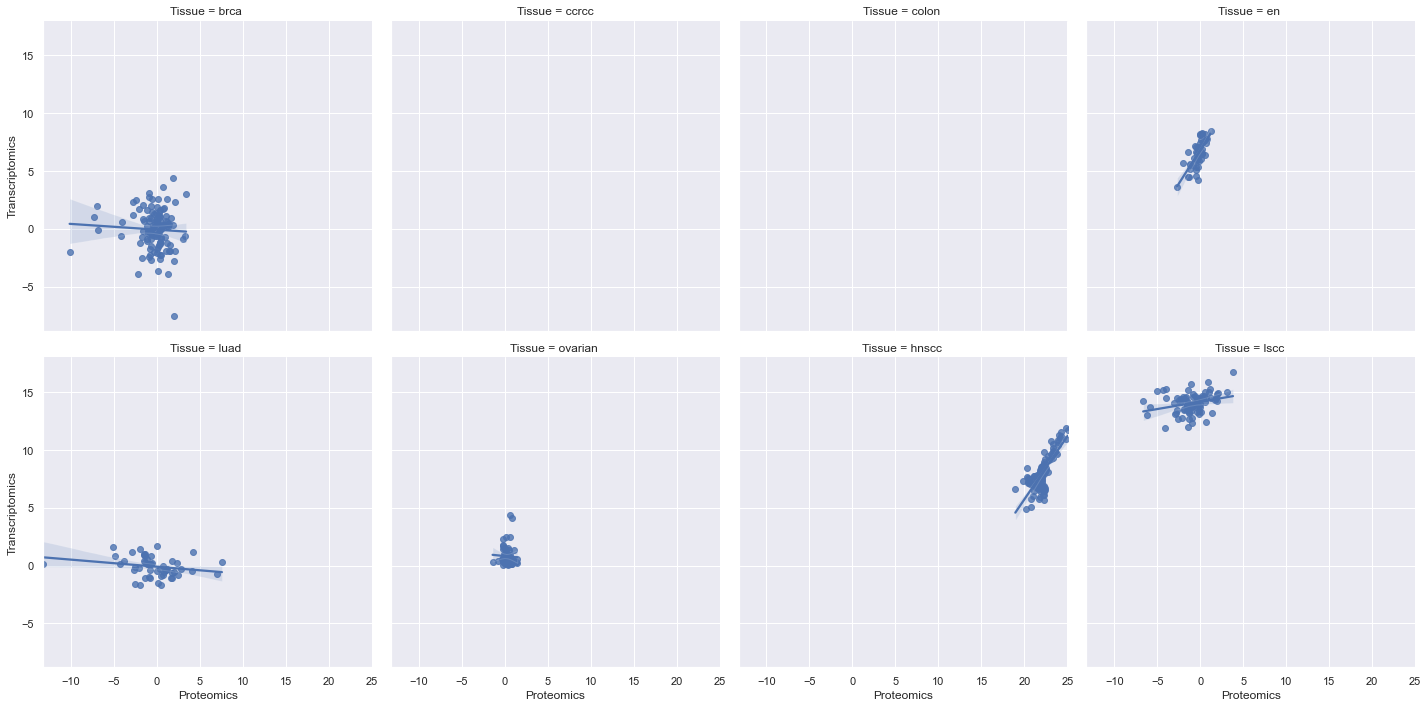

In [74]:
##All 4 in 1 plot Normal


protein_col = ((list(tumor_plot1_datap))+(list(tumor_plot2_datap))+(list(tumor_plot3_datap))+(list(tumor_plot4_datap))+(list(tumor_plot6_datap))+(list(tumor_plot7_datap))+(list(tumor_plot8_datap))+(list(tumor_plot9_datap)))
rna_col = ((list(tumor_plot1_datat))+(list(tumor_plot2_datat))+(list(tumor_plot3_datat))+(list(tumor_plot4_datat))+(list(tumor_plot6_datat))+(list(tumor_plot7_datat))+(list(tumor_plot8_datat))+(list(tumor_plot9_datat)))
gene_col = []
for i in range(122):
    gene_col.append('brca ')
for i in range(110):
    gene_col.append('ccrcc')
for i in range(107):
    gene_col.append('colon ')
for i in range(95):
    gene_col.append('en ')
# for i in range(99):
#     gene_col.append('gbm ')
for i in range(110):
    gene_col.append('luad ')
for i in range(102):
    gene_col.append('ovarian ')
for i in range(109):
    gene_col.append('hnscc ')
for i in range(108):
    gene_col.append('lscc ')
cols = {'Proteomics' : protein_col, 'Transcriptomics': rna_col, 'Tissue' : gene_col }
df = pd.DataFrame(cols)
plot = sns.lmplot(x="Proteomics", y="Transcriptomics", col="Tissue", data=df,
           col_wrap=4);
axes = plot.axes
# axes[0].set_ylim(-10,10)
# axes[0].set_xlim(-10,7.5)
plt.show()

In [46]:
len(tumor_plot9_datap)

108

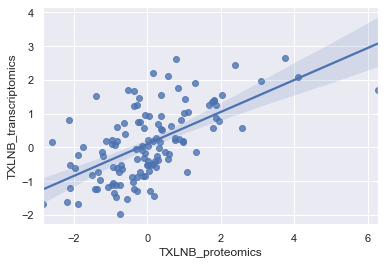

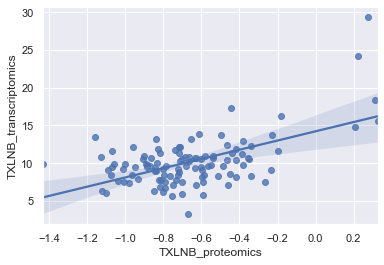

cptac warning: You tried to flatten a column index that didn't have multiple levels, so we didn't actually change anything. (C:\Users\humbe\miniconda3\lib\site-packages\cptac-0.8.1-py3.7.egg\cptac\dataset.py, line 697)


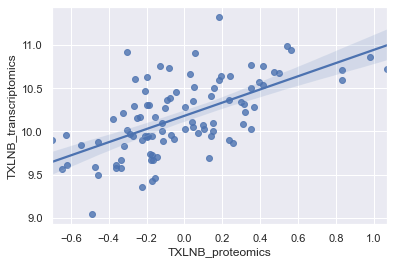

cptac warning: You tried to flatten a column index that didn't have multiple levels, so we didn't actually change anything. (C:\Users\humbe\miniconda3\lib\site-packages\cptac-0.8.1-py3.7.egg\cptac\dataset.py, line 697)


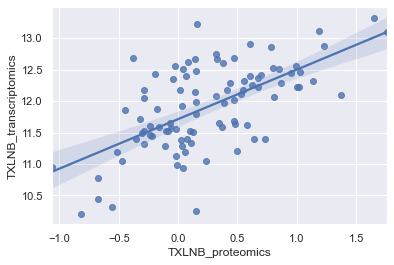

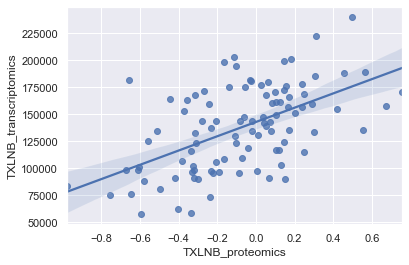

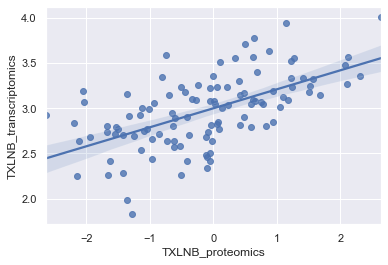

cptac warning: The following columns were not found in the transcriptomics dataframe, so they were inserted into joined table, but filled with NaN: VWA8 (C:\Users\humbe\miniconda3\lib\site-packages\ipykernel_launcher.py, line 66)


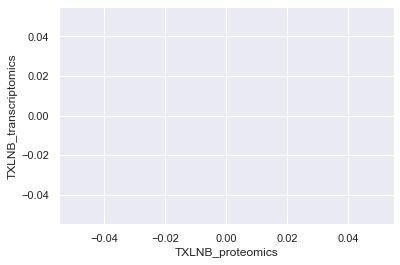

cptac warning: You tried to flatten a column index that didn't have multiple levels, so we didn't actually change anything. (C:\Users\humbe\miniconda3\lib\site-packages\cptac-0.8.1-py3.7.egg\cptac\dataset.py, line 697)


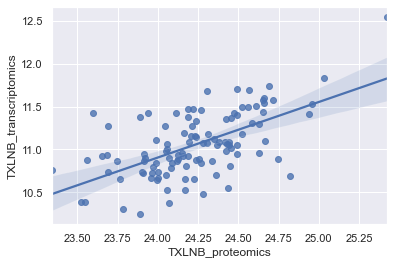

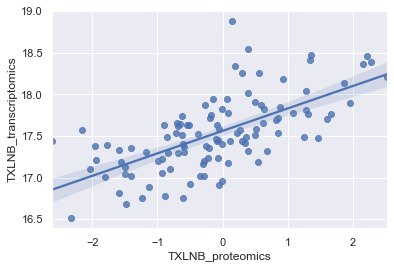

In [55]:
## Tumor correlations

test_prot_trans = brca.multi_join({'proteomics' : ['VWA8'], 'transcriptomics': ['VWA8']}, tissue_type = 'tumor', flatten = True)
test_prot_trans = pd.DataFrame(test_prot_trans[test_prot_trans.columns[0]]).join(pd.DataFrame(test_prot_trans[test_prot_trans.columns[-1]]),how= 'outer')
columns = test_prot_trans.columns
test_prot_trans = test_prot_trans.rename(columns={columns[0]: 'TXLNB_proteomics', columns[-1] : 'TXLNB_transcriptomics'})
tumor_plot1_datap = test_prot_trans['TXLNB_proteomics']
tumor_plot1_datat = test_prot_trans['TXLNB_transcriptomics']
tumor_plot1 = sns.regplot( x = 'TXLNB_proteomics', y= 'TXLNB_transcriptomics',  data = test_prot_trans)
# tumor_plot1.set(xlim=(-10,7.5),ylim=(-3,8))
plt.show()


test_prot_trans = ccrcc.multi_join({'proteomics' : ['VWA8'], 'transcriptomics': ['VWA8']}, tissue_type = 'tumor', flatten = True)
test_prot_trans = pd.DataFrame(test_prot_trans[test_prot_trans.columns[0]]).join(pd.DataFrame(test_prot_trans[test_prot_trans.columns[-1]]),how= 'outer')
columns = test_prot_trans.columns
test_prot_trans = test_prot_trans.rename(columns={columns[0]: 'TXLNB_proteomics', columns[-1] : 'TXLNB_transcriptomics'})
tumor_plot2_datap = test_prot_trans['TXLNB_proteomics']
tumor_plot2_datat = test_prot_trans['TXLNB_transcriptomics']
tumor_plot2 = sns.regplot( x = 'TXLNB_proteomics', y= 'TXLNB_transcriptomics',  data = test_prot_trans)
# tumor_plot2.set(xlim=(-10,7.5),ylim=(-3,8))
plt.show()


test_prot_trans = colon.multi_join({'proteomics' : ['VWA8'], 'transcriptomics': ['VWA8']}, tissue_type = 'tumor', flatten = True)
test_prot_trans = pd.DataFrame(test_prot_trans[test_prot_trans.columns[0]]).join(pd.DataFrame(test_prot_trans[test_prot_trans.columns[-1]]),how= 'outer')
columns = test_prot_trans.columns
test_prot_trans = test_prot_trans.rename(columns={columns[0]: 'TXLNB_proteomics', columns[-1] : 'TXLNB_transcriptomics'})
tumor_plot3_datap = test_prot_trans['TXLNB_proteomics']
tumor_plot3_datat = test_prot_trans['TXLNB_transcriptomics']
tumor_plot3 = sns.regplot( x = 'TXLNB_proteomics', y= 'TXLNB_transcriptomics',  data = test_prot_trans)
# tumor_plot3.set(xlim=(-10,7.5),ylim=(-3,8))
plt.show()


test_prot_trans = en.multi_join({'proteomics' : ['VWA8'], 'transcriptomics': ['VWA8']}, tissue_type = 'tumor', flatten = True)
test_prot_trans = pd.DataFrame(test_prot_trans[test_prot_trans.columns[0]]).join(pd.DataFrame(test_prot_trans[test_prot_trans.columns[-1]]),how= 'outer')
columns = test_prot_trans.columns
test_prot_trans = test_prot_trans.rename(columns={columns[0]: 'TXLNB_proteomics', columns[-1] : 'TXLNB_transcriptomics'})
tumor_plot4_datap = test_prot_trans['TXLNB_proteomics']
tumor_plot4_datat = test_prot_trans['TXLNB_transcriptomics']
tumor_plot4 = sns.regplot( x = 'TXLNB_proteomics', y= 'TXLNB_transcriptomics',  data = test_prot_trans)
# tumor_plot4.set(xlim=(-10,7.5),ylim=(-3,8))
plt.show()

test_prot_trans = gbm.multi_join({'proteomics' : ['VWA8'], 'transcriptomics': ['VWA8']}, tissue_type = 'tumor', flatten = True)
test_prot_trans = pd.DataFrame(test_prot_trans[test_prot_trans.columns[0]]).join(pd.DataFrame(test_prot_trans[test_prot_trans.columns[-1]]),how= 'outer')
columns = test_prot_trans.columns
test_prot_trans = test_prot_trans.rename(columns={columns[0]: 'TXLNB_proteomics', columns[-1] : 'TXLNB_transcriptomics'})
tumor_plot5_datap = test_prot_trans['TXLNB_proteomics']
tumor_plot5_datat = test_prot_trans['TXLNB_transcriptomics']
tumor_plot5 = sns.regplot( x = 'TXLNB_proteomics', y= 'TXLNB_transcriptomics',  data = test_prot_trans)
# tumor_plot5.set(xlim=(-10,7.5),ylim=(-3,8))
plt.show()

test_prot_trans = luad.multi_join({'proteomics' : ['VWA8'], 'transcriptomics': ['VWA8']}, tissue_type = 'tumor', flatten = True)
test_prot_trans = pd.DataFrame(test_prot_trans[test_prot_trans.columns[0]]).join(pd.DataFrame(test_prot_trans[test_prot_trans.columns[-1]]),how= 'outer')
columns = test_prot_trans.columns
test_prot_trans = test_prot_trans.rename(columns={columns[0]: 'TXLNB_proteomics', columns[-1] : 'TXLNB_transcriptomics'})
tumor_plot6_datap = test_prot_trans['TXLNB_proteomics']
tumor_plot6_datat = test_prot_trans['TXLNB_transcriptomics']
tumor_plot6 = sns.regplot( x = 'TXLNB_proteomics', y= 'TXLNB_transcriptomics',  data = test_prot_trans)
# tumor_plot6.set(xlim=(-10,7.5),ylim=(-3,8))
plt.show()

test_prot_trans = ovarian.multi_join({'proteomics' : ['VWA8'], 'transcriptomics': ['VWA8']}, tissue_type = 'tumor', flatten = True)
test_prot_trans = pd.DataFrame(test_prot_trans[test_prot_trans.columns[0]]).join(pd.DataFrame(test_prot_trans[test_prot_trans.columns[-1]]),how= 'outer')
columns = test_prot_trans.columns
test_prot_trans = test_prot_trans.rename(columns={columns[0]: 'TXLNB_proteomics', columns[-1] : 'TXLNB_transcriptomics'})
tumor_plot7_datap = test_prot_trans['TXLNB_proteomics']
tumor_plot7_datat = test_prot_trans['TXLNB_transcriptomics']
tumor_plot7 = sns.regplot( x = 'TXLNB_proteomics', y= 'TXLNB_transcriptomics',  data = test_prot_trans)
# tumor_plot7.set(xlim=(-10,7.5),ylim=(-3,8))
plt.show()

test_prot_trans = hnscc.multi_join({'proteomics' : ['VWA8'], 'transcriptomics': ['VWA8']}, tissue_type = 'tumor', flatten = True)
test_prot_trans = pd.DataFrame(test_prot_trans[test_prot_trans.columns[0]]).join(pd.DataFrame(test_prot_trans[test_prot_trans.columns[-1]]),how= 'outer')
columns = test_prot_trans.columns
test_prot_trans = test_prot_trans.rename(columns={columns[0]: 'TXLNB_proteomics', columns[-1] : 'TXLNB_transcriptomics'})
tumor_plot8_datap = test_prot_trans['TXLNB_proteomics']
tumor_plot8_datat = test_prot_trans['TXLNB_transcriptomics']
tumor_plot8 = sns.regplot( x = 'TXLNB_proteomics', y= 'TXLNB_transcriptomics',  data = test_prot_trans)
# tumor_plot8.set(xlim=(-10,7.5),ylim=(-3,8))
plt.show()

test_prot_trans = lscc.multi_join({'proteomics' : ['VWA8'], 'transcriptomics': ['VWA8']}, tissue_type = 'tumor', flatten = True)
test_prot_trans = pd.DataFrame(test_prot_trans[test_prot_trans.columns[0]]).join(pd.DataFrame(test_prot_trans[test_prot_trans.columns[-1]]),how= 'outer')
columns = test_prot_trans.columns
test_prot_trans = test_prot_trans.rename(columns={columns[0]: 'TXLNB_proteomics', columns[-1] : 'TXLNB_transcriptomics'})
tumor_plot9_datap = test_prot_trans['TXLNB_proteomics']
tumor_plot9_datat = test_prot_trans['TXLNB_transcriptomics']
tumor_plot9 = sns.regplot( x = 'TXLNB_proteomics', y= 'TXLNB_transcriptomics',  data = test_prot_trans)
# tumor_plot9.set(xlim=(-10,7.5),ylim=(-3,8))
plt.show()

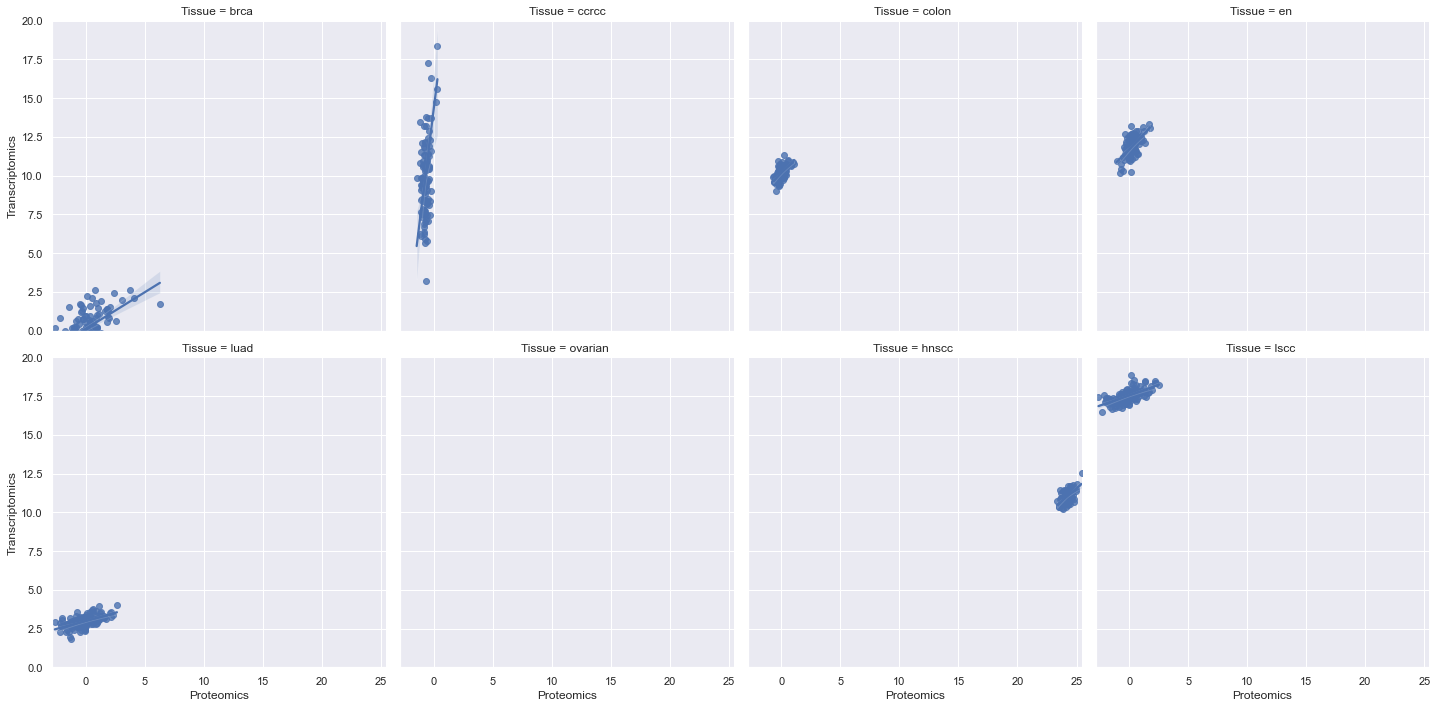

In [70]:
##All 4 in 1 plot Normal


protein_col = ((list(tumor_plot1_datap))+(list(tumor_plot2_datap))+(list(tumor_plot3_datap))+(list(tumor_plot4_datap))+(list(tumor_plot6_datap))+(list(tumor_plot7_datap))+(list(tumor_plot8_datap))+(list(tumor_plot9_datap)))
rna_col = ((list(tumor_plot1_datat))+(list(tumor_plot2_datat))+(list(tumor_plot3_datat))+(list(tumor_plot4_datat))+(list(tumor_plot6_datat))+(list(tumor_plot7_datat))+(list(tumor_plot8_datat))+(list(tumor_plot9_datat)))
gene_col = []
for i in range(122):
    gene_col.append('brca ')
for i in range(110):
    gene_col.append('ccrcc')
for i in range(107):
    gene_col.append('colon ')
for i in range(95):
    gene_col.append('en ')
# for i in range(99):
#     gene_col.append('gbm ')
for i in range(110):
    gene_col.append('luad ')
for i in range(102):
    gene_col.append('ovarian ')
for i in range(109):
    gene_col.append('hnscc ')
for i in range(108):
    gene_col.append('lscc ')
cols = {'Proteomics' : protein_col, 'Transcriptomics': rna_col, 'Tissue' : gene_col }
df = pd.DataFrame(cols)
plot = sns.lmplot(x="Proteomics", y="Transcriptomics", col="Tissue", data=df,
           col_wrap=4);
axes = plot.axes
axes[0].set_ylim(0,20)
# axes[0].set_xlim(-10,7.5)
plt.show()

In [65]:
len(tumor_plot3_datap)

107